In [ ]:
import os, sys
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct, Matern,  RationalQuadratic, WhiteKernel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My\ Drive/University/Courses/Introduction\ to\ Deep\ Learning/Project\ /Codes/Task3

/content/drive/My Drive/University/Courses/Introduction to Deep Learning/Project /Codes/Task3


In [ ]:
DataPath  = '../../Datasets/'

data = pd.read_excel(DataPath+'PretestData.xlsx')

In [ ]:
data.head()

,Patient,WBC,Lymphocytes,Basophils,Eosinophils,Neutrophils,CRP,Platelets,COVID
0,1,11.90,1.08,0.01,0.01,10.8,38.9,188,Yes
1,2,9.28,0.36,0.02,0.00,8.9,22.6,132,Yes
2,3,4.81,0.28,0.03,0.00,4.5,NaN,283,Yes
3,4,2.57,0.74,0.03,0.00,1.8,107.2,257,Yes
4,5,6.62,1.98,0.01,0.13,4.5,27.9,582,Yes


### Visualize missing data

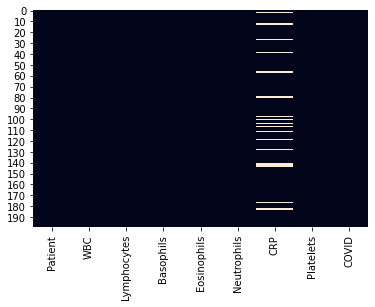

In [ ]:
sns.heatmap(data.isnull(), cbar=False)

### Dropping the missing data of WBC types

In [ ]:
data = data.dropna(subset = ['Platelets','Neutrophils','Lymphocytes','Eosinophils','Basophils'])
print('Data shape: ', data.shape)

Data shape:  (200, 9)


### Statistical view of data

In [ ]:
data.describe()

,Patient,WBC,Lymphocytes,Basophils,Eosinophils,Neutrophils,CRP,Platelets
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,180.000000,200.000000
mean,100.500000,8.437400,1.422500,0.032100,0.091800,6.891000,71.871111,231.230000
std,57.879185,7.343684,0.952311,0.031473,0.179994,7.118503,89.524211,93.594856
min,1.000000,1.610000,0.100000,0.000000,0.000000,1.000000,1.000000,54.000000
25%,50.750000,4.730000,0.755000,0.010000,0.000000,3.600000,6.575000,174.750000
50%,100.500000,7.185000,1.125000,0.030000,0.020000,5.450000,44.950000,214.000000
75%,150.250000,10.407500,2.017500,0.040000,0.102500,8.625000,106.825000,280.000000
max,200.000000,87.270000,6.910000,0.210000,1.200000,85.600000,613.700000,732.000000


In [ ]:
for i in range(len(data)):
    if data.loc[i,'COVID'] =='Yes':
        data.loc[i,'COVID'] = 1
    else:
        data.loc[i,'COVID'] = 0

In [ ]:
data = data[data['Neutrophils'] <= 14]  

In [ ]:
data.head()

,Patient,WBC,Lymphocytes,Basophils,Eosinophils,Neutrophils,CRP,Platelets,COVID
0,1,11.90,1.08,0.01,0.01,10.8,38.9,188,1
1,2,9.28,0.36,0.02,0.00,8.9,22.6,132,1
2,3,4.81,0.28,0.03,0.00,4.5,NaN,283,1
3,4,2.57,0.74,0.03,0.00,1.8,107.2,257,1
4,5,6.62,1.98,0.01,0.13,4.5,27.9,582,1


### Extracting platelets and WBC counts as features 

In [ ]:
M = data[['WBC','Platelets','Neutrophils','Lymphocytes', 'Eosinophils','Basophils', 'COVID']]
M  = M[M.apply(pd.to_numeric, errors='coerce').notna()].dropna()
X = M[['WBC','Platelets','Neutrophils','Lymphocytes','Eosinophils','Basophils']].values
y = M['COVID'].values

# Do we want to include parameters like gender and age ? we can try !

### Pairwise relationship of features

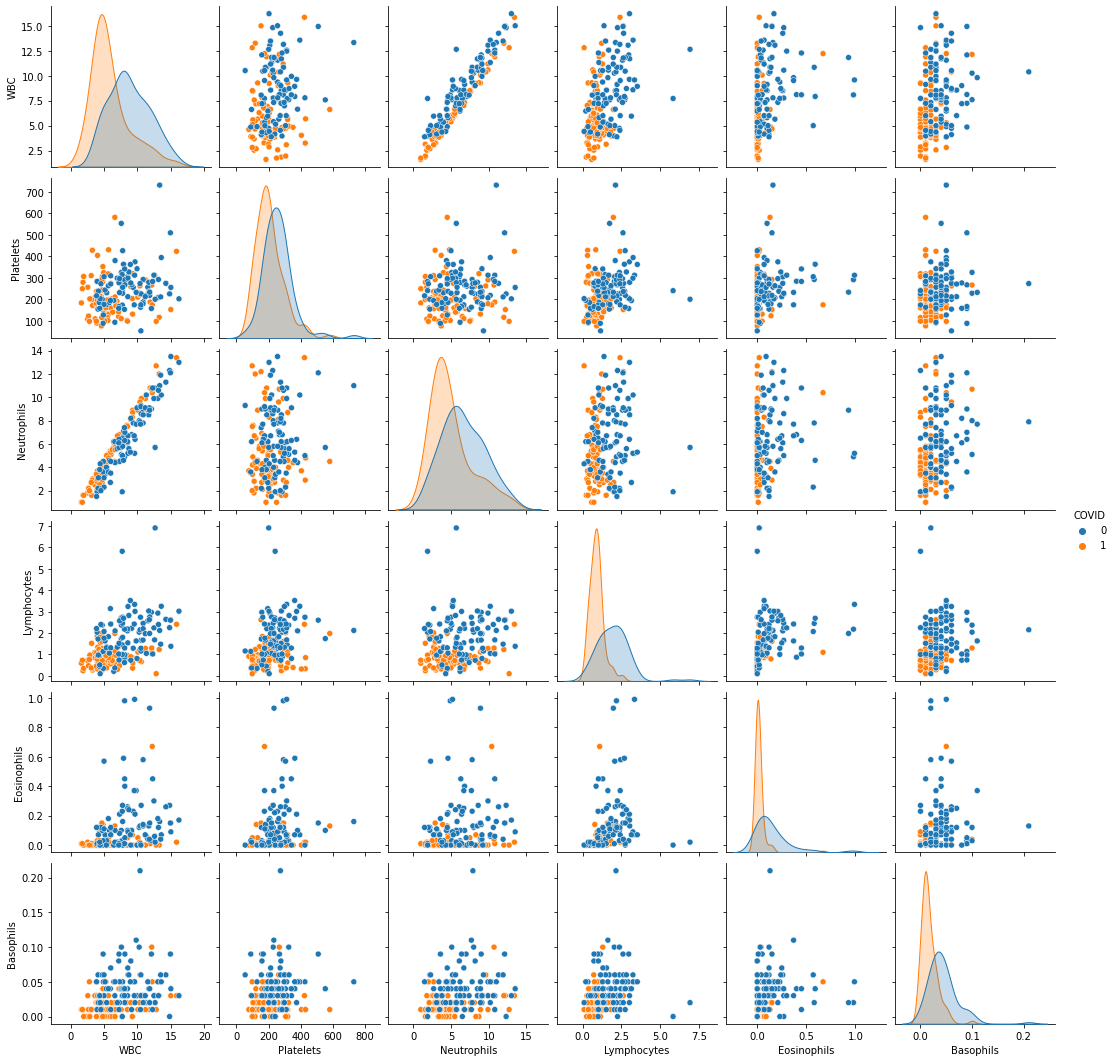

In [ ]:
sns.pairplot(data[['WBC','Platelets','Neutrophils','Lymphocytes', 'Eosinophils','Basophils','COVID']], hue="COVID")

### Pre-evaluation of different Classifiers

In [ ]:
names = ["Logistic Regression","Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    LogisticRegression(random_state=0),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

### Preprocess dataset, split into training and test part

In [ ]:
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2)

In [ ]:
df = pd.DataFrame(index = names, columns= ['Accuracy score'])

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    df.loc[name,'Accuracy score'] = score 

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
df

,Accuracy score
Logistic Regression,0.868421
Nearest Neighbors,0.842105
Linear SVM,0.894737
RBF SVM,0.815789
Gaussian Process,0.842105
Decision Tree,0.815789
Random Forest,0.815789
Neural Net,0.868421
AdaBoost,0.842105
Naive Bayes,0.894737


## Hyper parameter tunning of Classifiers

### 1. Logistic Regression 

In [ ]:
logr_gs = LogisticRegression(max_iter=1000)

parameter_space = {
    'penalty': ['l1','l2' ],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C': [0.1, 0.5, 1, 5, 10],
}


clf_logr = GridSearchCV(logr_gs, parameter_space, n_jobs=-1, cv=5)
clf_logr.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print('Best parameters found for Logistic Regression:\n', clf_logr.best_params_)
print('Score for best Logistic Rregression: ', np.round(clf_logr.best_score_,2))

Best parameters found for Logistic Regression:
 {'C': 5, 'penalty': 'l1', 'solver': 'saga'}
Score for best Logistic Rregression:  0.86


In [ ]:
y_true, y_pred = y_test , clf_logr.predict(X_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.89      0.85      0.87        20

    accuracy                           0.87        38
   macro avg       0.87      0.87      0.87        38
weighted avg       0.87      0.87      0.87        38



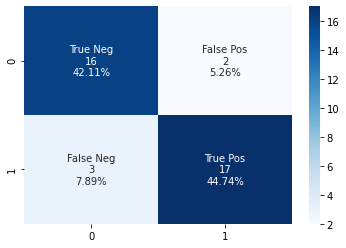

In [ ]:
cf_matrix = confusion_matrix(y_true, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### 2. Nearest Neighbor

In [ ]:
knn_gs = KNeighborsClassifier()

parameter_space = {
    'n_neighbors':[3, 5, 7, 10],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
}


clf_knn = GridSearchCV(knn_gs, parameter_space, n_jobs=-1, cv=5)
clf_knn.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print('Best parameters found for K-Nearest Neighbor:\n', clf_knn.best_params_)
print('Score for best  K-Nearest Neighbor: ', np.round(clf_knn.best_score_,2))

Best parameters found for K-Nearest Neighbor:
 {'algorithm': 'auto', 'n_neighbors': 10}
Score for best  K-Nearest Neighbor:  0.85


In [ ]:
y_true, y_pred = y_test , clf_knn.predict(X_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.90      0.90      0.90        20

    accuracy                           0.89        38
   macro avg       0.89      0.89      0.89        38
weighted avg       0.89      0.89      0.89        38



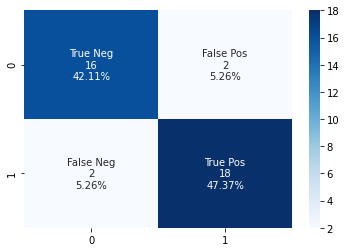

In [ ]:
cf_matrix = confusion_matrix(y_true, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### 3. Linear SVM

In [ ]:
svc_gs = LinearSVC(tol=1e-5, dual= False)

parameter_space = {
    'penalty': ['l1','l2' ],
    'loss':['hinge', 'squared_hinge'],
    'C': [0.1, 0.5, 1, 5, 10],
}


clf_Lsvc = GridSearchCV(svc_gs, parameter_space, n_jobs=-1, cv=5)
clf_Lsvc.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=1e-05, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 5, 10],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print('Best parameters found for Linear SVM:\n', clf_Lsvc.best_params_)
print('Score for best Linear SVM: ', np.round(clf_Lsvc.best_score_,2))

Best parameters found for Linear SVM:
 {'C': 5, 'loss': 'squared_hinge', 'penalty': 'l1'}
Score for best Linear SVM:  0.85


In [ ]:
y_true, y_pred = y_test , clf_Lsvc.best_estimator_.predict(X_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.89      0.85      0.87        20

    accuracy                           0.87        38
   macro avg       0.87      0.87      0.87        38
weighted avg       0.87      0.87      0.87        38



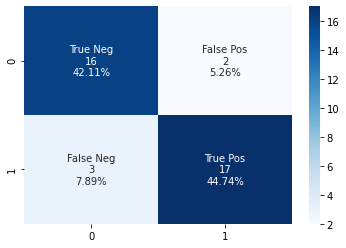

In [ ]:
cf_matrix = confusion_matrix(y_true, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### 4. Non-linear SVC


In [ ]:
svc_gs = SVC(probability = True)

parameter_space = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma':['scale', 'auto'],
    'C': [0.1, 0.5, 1, 5, 10],
}


clf_svc = GridSearchCV(svc_gs, parameter_space, n_jobs=-1, cv=5)
clf_svc.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print('Best parameters found for Non-Linear SVM:\n', clf_svc.best_params_)
print('Score for best Non-Linear SVM: ', np.round(clf_svc.best_score_,2))

Best parameters found for Non-Linear SVM:
 {'C': 5, 'gamma': 'scale', 'kernel': 'linear'}
Score for best Non-Linear SVM:  0.87


In [ ]:
y_true, y_pred = y_test , clf_svc.predict(X_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.85      0.85      0.85        20

    accuracy                           0.84        38
   macro avg       0.84      0.84      0.84        38
weighted avg       0.84      0.84      0.84        38



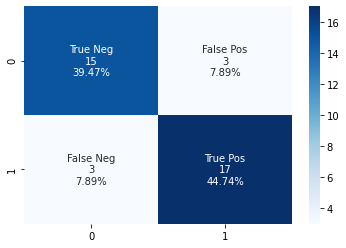

In [ ]:
cf_matrix = confusion_matrix(y_true, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### 5. Gaussian Process

In [ ]:
gpc_gs = GaussianProcessClassifier()

parameter_space = {
    'kernel': [1*RBF(), 1*DotProduct(), 1*Matern(),  1*RationalQuadratic(), 1*WhiteKernel()],
}


clf_gpc = GridSearchCV(gpc_gs, parameter_space, n_jobs=-1, cv=5)
clf_gpc.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score=nan,
             estimator=GaussianProcessClassifier(copy_X_train=True, kernel=None,
                                                 max_iter_predict=100,
                                                 multi_class='one_vs_rest',
                                                 n_jobs=None,
                                                 n_restarts_optimizer=0,
                                                 optimizer='fmin_l_bfgs_b',
                                                 random_state=None,
                                                 warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'kernel': [1**2 * RBF(length_scale=1),
                                    1**2 * DotProduct(sigma_0=1),
                                    1**2 * Matern(length_scale=1, nu=1.5),
                                    1**2 * RationalQuadratic(alpha=1, length_scale=1),
                                    1**2 * WhiteKernel(

In [ ]:
print('Best parameters found for GPC:\n', clf_gpc.best_params_)
print('Score for best GPC: ', np.round(clf_gpc.best_score_,2))

Best parameters found for GPC:
 {'kernel': 1**2 * DotProduct(sigma_0=1)}
Score for best GPC:  0.85


In [ ]:
y_true, y_pred = y_test , clf_gpc.predict(X_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.90      0.90      0.90        20

    accuracy                           0.89        38
   macro avg       0.89      0.89      0.89        38
weighted avg       0.89      0.89      0.89        38



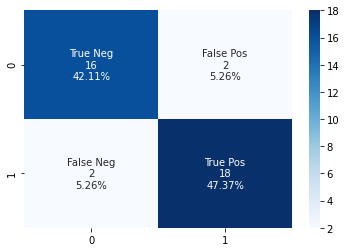

In [ ]:
cf_matrix = confusion_matrix(y_true, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### 6. Decision Tree

In [ ]:
DT_gs = DecisionTreeClassifier()

parameter_space = {
    'max_depth': np.arange(3, 10),
    'max_features': ['auto', 'sqrt'],
    'max_depth': np.linspace(10, 110, num = 11),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion' : ['gini', 'entropy']
}


clf_DT = GridSearchCV(DT_gs, parameter_space, n_jobs=-1, cv=5)
clf_DT.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
print('Best parameters found for Decision Tree Classifier:\n', clf_DT.best_params_)
print('Score for best Decision Tree Classifier: ', np.round(clf_DT.best_score_,2))

Best parameters found for Decision Tree Classifier:
 {'criterion': 'entropy', 'max_depth': 40.0, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Score for best Decision Tree Classifier:  0.84


In [ ]:
y_true, y_pred = y_test , clf_DT.predict(X_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.84      0.80      0.82        20

    accuracy                           0.82        38
   macro avg       0.82      0.82      0.82        38
weighted avg       0.82      0.82      0.82        38



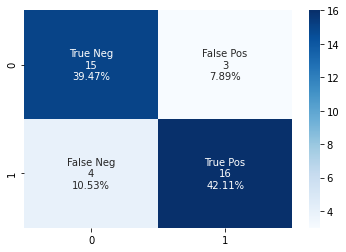

In [ ]:
cf_matrix = confusion_matrix(y_true, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### 7. Random Forest 

In [ ]:
RF_gs = RandomForestClassifier()

parameter_space = {
            'n_estimators': [10, 50, 100, 500, 1000],
            'max_features': ['auto', 'sqrt'],
               'max_depth': [2, 4, 6, 8, 10],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
}


clf_RF = GridSearchCV(RF_gs, parameter_space, n_jobs=-1, cv=5)
clf_RF.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print('Best parameters found for Random Forest Classifier:\n', clf_RF.best_params_)
print('Score for best Random Forest Classifier: ', np.round(clf_RF.best_score_,2))

Best parameters found for Random Forest Classifier:
 {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 10}
Score for best Random Forest Classifier:  0.84


In [ ]:
y_true, y_pred = y_test , clf_RF.predict(X_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        18
           1       0.79      0.75      0.77        20

    accuracy                           0.76        38
   macro avg       0.76      0.76      0.76        38
weighted avg       0.76      0.76      0.76        38



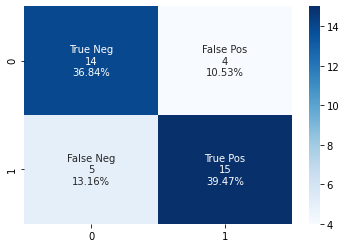

In [ ]:
cf_matrix = confusion_matrix(y_true, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy_score(y_true, y_pred)

0.7631578947368421

### 8. NeuralNet

In [ ]:
mlp_gs = MLPClassifier(max_iter=1000)

parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,40,20), ],
    'activation': ['logistic','tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
}


clf_mlp = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf_mlp.fit(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [0.0

In [ ]:
print('Best parameters found for MLP:\n', clf_mlp.best_params_)
print('Score for best MLP: ', np.round(clf_mlp.best_score_,2))

Best parameters found for MLP:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (20, 40, 20), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Score for best MLP:  0.87


In [ ]:
y_true, y_pred = y_test , clf_mlp.predict(X_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.89      0.85      0.87        20

    accuracy                           0.87        38
   macro avg       0.87      0.87      0.87        38
weighted avg       0.87      0.87      0.87        38



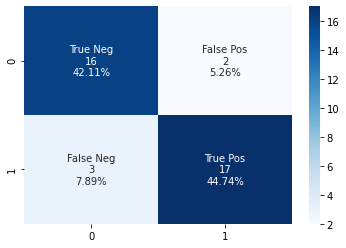

In [ ]:
cf_matrix = confusion_matrix(y_true, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### 9. Adaboost

In [ ]:
ABC_gs = AdaBoostClassifier()

parameter_space = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'algorithm':['SAMME', 'SAMME.R'],
    'learning_rate': [ 0.001, 0.01, 0.1],
}


clf_ABC = GridSearchCV(ABC_gs, parameter_space, n_jobs=-1, cv=5)
clf_ABC.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [10, 50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print('Best parameters found for Adaboost Classifier:\n', clf_ABC.best_params_)
print('Score for best Adaboost Classifier: ', np.round(clf_ABC.best_score_,2))

Best parameters found for Adaboost Classifier:
 {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}
Score for best Adaboost Classifier:  0.84


In [ ]:
y_true, y_pred = y_test , clf_ABC.predict(X_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.89      0.80      0.84        20

    accuracy                           0.84        38
   macro avg       0.84      0.84      0.84        38
weighted avg       0.85      0.84      0.84        38



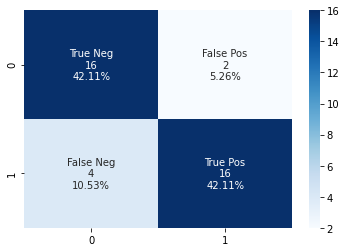

In [ ]:
cf_matrix = confusion_matrix(y_true, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
models = 
# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()  

97